In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.stats.libqsturng import psturng

# Zadanie 
Pewna grupa poddała się trzem testom.
Na podstawie poniższych wyników chcielibyśmy zweryfikować hipotezę zerowa mówiącą, że środni wynik w tych trzech testach jest taki sam.

In [7]:
data = np.rec.array([
    (  1,   'mental',  2 ),
    (  2,   'mental',  2 ),
    (  3,   'mental',  3 ),
    (  4,   'mental',  4 ),
    (  5,   'mental',  4 ),
    (  6,   'mental',  5 ),
    (  7,   'mental',  3 ),
    (  8,   'mental',  4 ),
    (  9,   'mental',  4 ),
    ( 10,   'mental',  4 ),
    ( 11, 'physical',  4 ),
    ( 12, 'physical',  4 ),
    ( 13, 'physical',  3 ),
    ( 14, 'physical',  5 ),
    ( 15, 'physical',  4 ),
    ( 16, 'physical',  1 ),
    ( 17, 'physical',  1 ),
    ( 18, 'physical',  2 ),
    ( 19, 'physical',  3 ),
    ( 20, 'physical',  3 ),
    ( 21,  'medical',  1 ),
    ( 22,  'medical',  2 ),
    ( 23,  'medical',  2 ),
    ( 24,  'medical',  2 ),
    ( 25,  'medical',  3 ),
    ( 26,  'medical',  2 ),
    ( 27,  'medical',  3 ),
    ( 28,  'medical',  1 ),
    ( 29,  'medical',  3 ),
    ( 30,  'medical',  1 )], dtype=[('idx', '<i4'),
                                    ('Treatment', '|S8'),
                                    ('StressReduction', '<i4')])

# Wykonujemy test ANOVA

In [16]:
df = pd.DataFrame(data)
d1=df["StressReduction"][df["Treatment"]==b'mental']
d2=df["StressReduction"][df["Treatment"]==b'physical']
d3=df["StressReduction"][df["Treatment"]==b'medical']

In [19]:
print("Mental:  ", np.mean(d1))
print("Physical: ", np.mean(d2))
print("Medical: ",np.mean(d3))

('Mental:  ', 3.5)
('Physical: ', 3.0)
('Medical: ', 2.0)


In [12]:
# Levena
(f, p) = stats.levene(d1,d2,d3)
print ('LEVENA ANOVA')
print ('=============')
print ('P value:', p)

LEVENA ANOVA
('P value:', 0.4567120561411028)


In [14]:
f, p = stats.f_oneway(d1,d2,d3)
 
print ('One-way ANOVA')
print ('=============')
 
print ('F value:', f)
print ('P value:', p)

One-way ANOVA
('F value:', 5.163934426229508)
('P value:', 0.012617190941750378)


## Wniosek

...

# Wykonujemy analizę post hoc

In [23]:
print(pairwise_tukeyhsd(data['StressReduction'], data['Treatment']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1  group2  meandiff  lower  upper  reject
-----------------------------------------------
medical  mental    1.5     0.3217 2.6783  True 
medical physical   1.0    -0.1783 2.1783 False 
 mental physical   -0.5   -1.6783 0.6783 False 
-----------------------------------------------


In [24]:
multiComp = MultiComparison(data['StressReduction'], data['Treatment'])

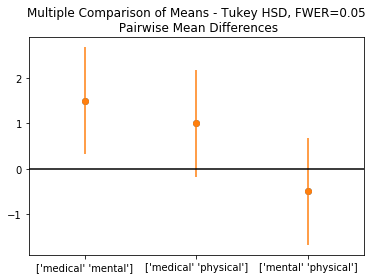

In [25]:
# Get the data
xvals = np.arange(3)
res2 = pairwise_tukeyhsd(data['StressReduction'], data['Treatment'])
errors = np.ravel(np.diff(res2.confint)/2)

# Plot them
plt.plot(xvals, res2.meandiffs, 'o')
plt.errorbar(xvals, res2.meandiffs, yerr=errors, fmt='o')

# Put on labels
pair_labels = multiComp.groupsunique[np.column_stack(res2._multicomp.pairindices)]
plt.xticks(xvals, pair_labels)

# Format the plot
xlim = -0.5, 2.5
plt.hlines(0, *xlim)
plt.xlim(*xlim)
plt.title('Multiple Comparison of Means - Tukey HSD, FWER=0.05' + '\n Pairwise Mean Differences')          
plt.show()